In [3]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. 读取数据并进行基本检查
data = pd.read_csv('output\marketing_campaign_clusters.csv')
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2212 non-null   int64  
 1   Age                 2212 non-null   int64  
 2   Education           2212 non-null   int64  
 3   Marital Status      2212 non-null   int64  
 4   Parental Status     2212 non-null   int64  
 5   Children            2212 non-null   int64  
 6   Income              2212 non-null   float64
 7   Spent               2212 non-null   int64  
 8   Customer Loyalty    2212 non-null   int64  
 9   Recency             2212 non-null   int64  
 10  Wines               2212 non-null   int64  
 11  Fruits              2212 non-null   int64  
 12  Meat                2212 non-null   int64  
 13  Fish                2212 non-null   int64  
 14  Sweets              2212 non-null   int64  
 15  Gold                2212 non-null   int64  
 16  Web   

In [5]:
# 2. 检查是否有缺失值
missing_data = data.isnull().sum()
print("Missing data per column:\n", missing_data)

Missing data per column:
 ID                    0
Age                   0
Education             0
Marital Status        0
Parental Status       0
Children              0
Income                0
Spent                 0
Customer Loyalty      0
Recency               0
Wines                 0
Fruits                0
Meat                  0
Fish                  0
Sweets                0
Gold                  0
Web                   0
Catalog               0
Store                 0
Discount Purchases    0
Total Promo           0
Web Engagement        0
Clusters              0
dtype: int64


In [9]:
# 3. 数据清洗（确保数值类型正确）
data['Spent'] = pd.to_numeric(data['Spent'], errors='coerce')
data['Clusters'] = data['Clusters'].astype('category')

In [10]:
# 4. 分组均值检查
group_means = data.groupby('Clusters')['Spent'].mean()
print("Mean Spent by Cluster:\n", group_means)

Mean Spent by Cluster:
 Clusters
0    1421.509804
1      97.341439
2     474.838462
3    1089.204787
Name: Spent, dtype: float64


C:\Users\86153\AppData\Local\Temp\ipykernel_16468\1022485159.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = data.groupby('Clusters')['Spent'].mean()


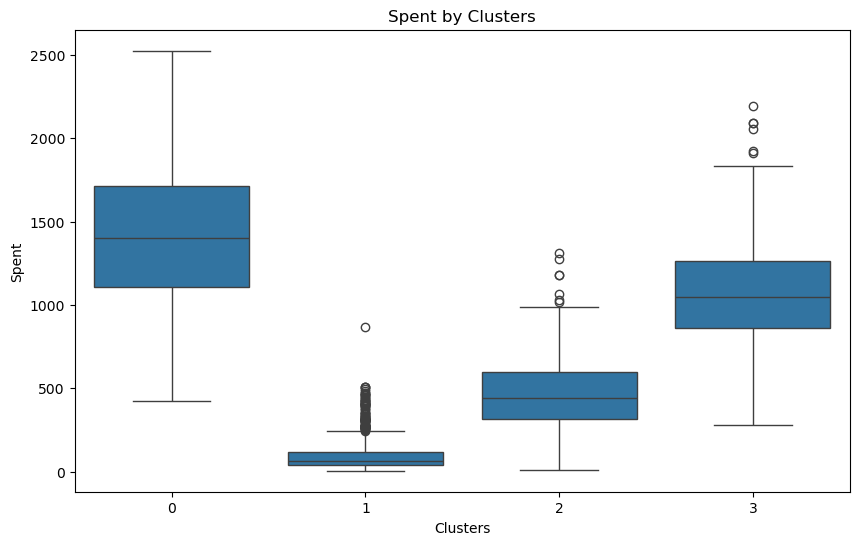

In [11]:
# 5. 可视化总支出在各个聚类组的分布情况
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Spent', data=data)
plt.title("Spent by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Spent")
plt.show()

>Residual: 组内平方和（Sum of Squares Within Groups）,它反映了每个聚类组内部数据点相对于组均值的差异，表示样本在组内的随机波动.`F` 和 `PR(>F)`：这些列通常是 `NaN`，因为残差部分没有统计检验



In [23]:
# 6. ANOVA 分析
# 构建模型
model = ols('Spent ~ C(Clusters)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:\n", anova_table)

ANOVA results:
                    sum_sq      df            F  PR(>F)
C(Clusters)  6.551276e+08     3.0  3268.647759     0.0
Residual     1.475148e+08  2208.0          NaN     NaN


In [ ]:
# 7. 结果解释(给出组间差异的p值)
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print(f"The p-value is {p_value:.4f}, which is less than 0.05. We reject the null hypothesis.")
    print("This suggests that there is a statistically significant difference in 'Spent' across different clusters.\n")
else:
    print(f"The p-value is {p_value:.4f}, which is greater than 0.05. We fail to reject the null hypothesis.")
    print("This suggests that there is no statistically significant difference in 'Spent' across different clusters.")

The p-value is 0.0000, which is less than 0.05. We reject the null hypothesis.
This suggests that there is a statistically significant difference in 'Spent' across different clusters.



C:\Users\86153\AppData\Local\Temp\ipykernel_16468\2990087028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
